In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from IPython.display import Markdown, display

In [2]:
data = pd.read_csv('ventas-totales-supermercados.csv')
df = pd.DataFrame(data)
df = df.set_index('indice_tiempo')
df.index = pd.to_datetime(df.index)

In [3]:
def detectar_valores_atipicos(df):
    outliers = {}

    for columna in df:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        umbral_bajo = Q1 - 1.5 * IQR
        umbral_alto = Q3 + 1.5 * IQR
        outliers = df[(df[columna] < umbral_bajo) | (df[columna] > umbral_alto)]

    return outliers

In [4]:
outliers = detectar_valores_atipicos(df)

#for columna, outlier_indices in outliers.items():
    #print(f'Valores atípicos en la columna {columna}:\n {outlier_indices}\n')

## "Melted Dataframe" para separar los productos en una categoría aparte:

In [5]:
df_reset = df.reset_index()

df_melted_productos = pd.melt(df_reset,
                              id_vars = ['indice_tiempo'], 
                              value_vars = ['ventas_totales_grupo_articulos',
                                            'subtotal_ventas_alimentos_bebidas', 'bebidas', 'almacen', 'panaderia',
                                            'lacteos', 'carnes', 'verduleria_fruteria',
                                            'alimentos_preparados_rotiseria', 'articulos_limpieza_perfumeria',
                                            'indumentaria_calzado_textiles_hogar', 'electronicos_articulos_hogar',
                                            'otros'], 
                              var_name = 'producto', 
                              value_name = 'cantidad vendida')

df_melted_productos = df_melted_productos.sort_values(by = 'cantidad vendida', ascending = False)

## Analizando estos valores atípicos, vemos que en casi todas las categorías del dataframe, las ventas suben considerablemente a partir de 2023, producto del contexto electoral que se vivió en el país.

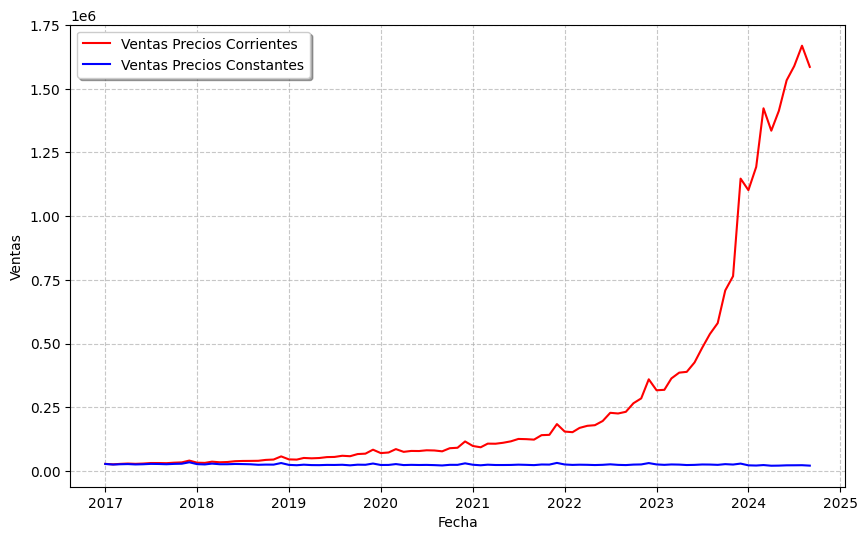

In [6]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = df.index, y = 'ventas_precios_corrientes', data = df, color = 'red', label = 'Ventas Precios Corrientes')
sns.lineplot(x = df.index, y = 'ventas_precios_constantes', data = df, color = 'blue', label = 'Ventas Precios Constantes')
plt.ylabel('Ventas')
plt.xlabel('Fecha')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'best', shadow = True)
plt.show()

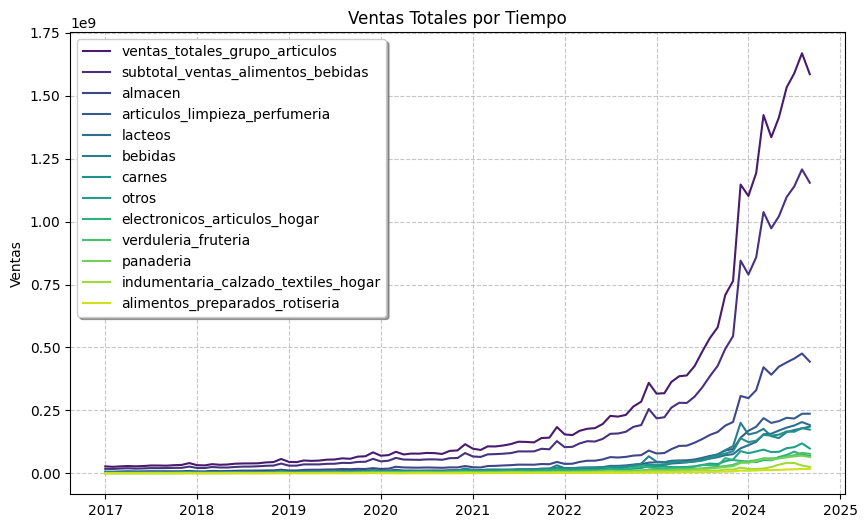

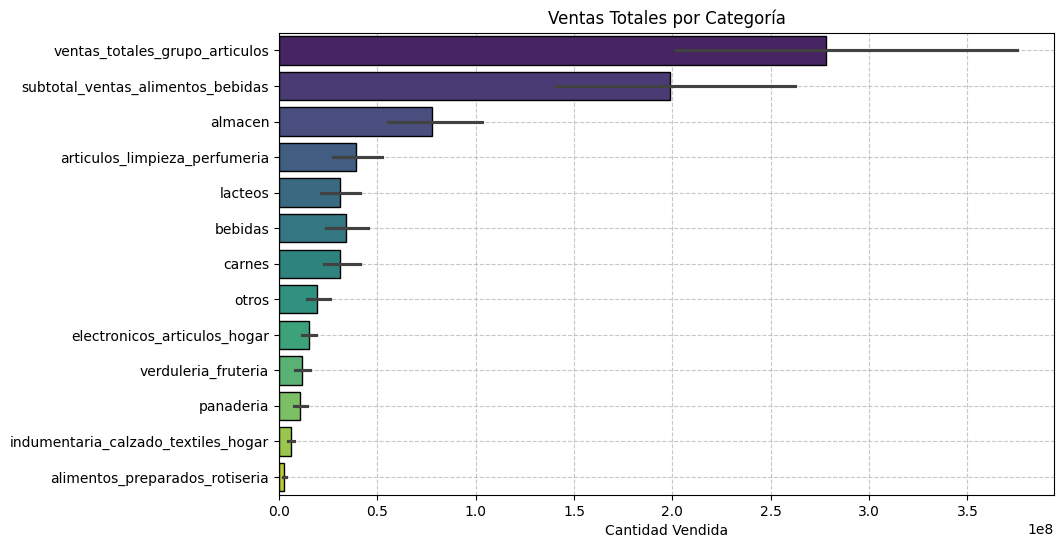

In [7]:
# Ventas totales por tiempo:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'indice_tiempo', y = 'cantidad vendida', data = df_melted_productos, hue = 'producto', palette = 'viridis')
plt.title('Ventas Totales por Tiempo')
plt.ylabel('Ventas')
plt.xlabel('')
plt.legend(loc = 'best', shadow = True)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

# Ventas totales por categoría:
plt.figure(figsize = (10, 6))
ax_1 = sns.barplot(df_melted_productos, x = 'cantidad vendida', y = 'producto', hue = 'producto', legend = False, palette = 'viridis', edgecolor = "black")
ax_1.set_axisbelow(True)
plt.title('Ventas Totales por Categoría')
plt.xlabel('Cantidad Vendida')
plt.ylabel('')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

## Si vemos más en detalle los años 2023 y 2024, las ventas comienzan a subir mucho a partir de noviembre de 2023 debido a la expectativa de la gente por el cambio de gobierno. En 2024, las ventas continúan creciendo en forma acelerada a causa de la constante caída de la inflación y del progresivo crecimiento económico, generando un congelamiento en los precios y en muchos casos, una bajada de precios:

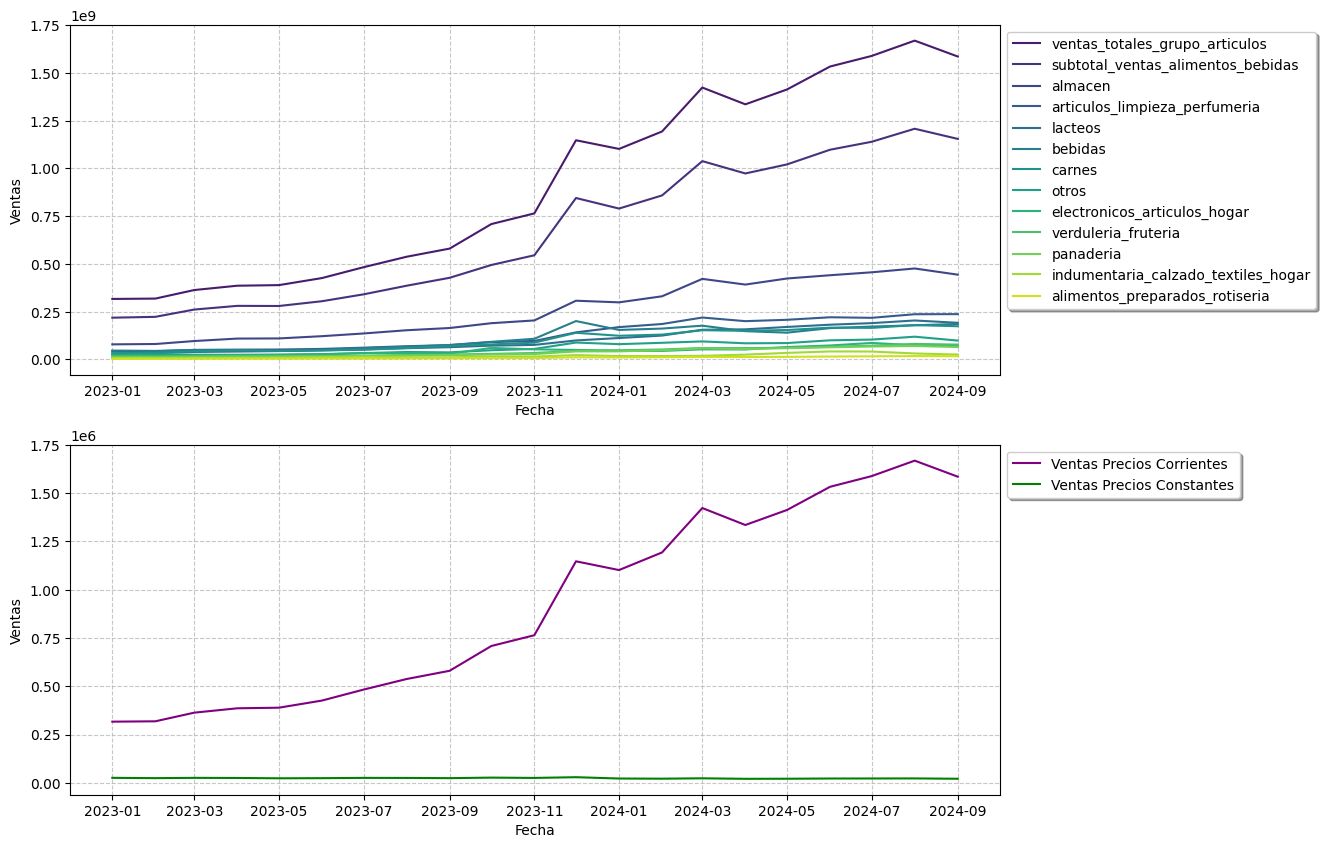

In [8]:
df_2023_2024 = df[df.index.year.isin([2023, 2024])]
df_temp = df_melted_productos.copy().set_index('indice_tiempo')
df_2023_2024_productos = df_temp[df_temp.index.year.isin([2023, 2024])]

plt.figure(figsize = (12, 10))

plt.subplot(2, 1, 1)
sns.lineplot(x = 'indice_tiempo', y = 'cantidad vendida', data = df_2023_2024_productos, hue = 'producto', palette = 'viridis')
plt.ylabel('Ventas')
plt.xlabel('Fecha')
plt.legend(loc = 'best', shadow = True, bbox_to_anchor=(1, 1))
plt.grid(True, linestyle = '--', alpha = 0.7)

plt.subplot(2, 1, 2)
sns.lineplot(x = df_2023_2024.index, y = 'ventas_precios_corrientes', data = df_2023_2024, color = 'purple', label = 'Ventas Precios Corrientes')
sns.lineplot(x = df_2023_2024.index, y = 'ventas_precios_constantes', data = df_2023_2024, color = 'green', label = 'Ventas Precios Constantes')
plt.ylabel('Ventas')
plt.xlabel('Fecha')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'best', shadow = True, bbox_to_anchor=(1, 1))

display(Markdown("## Si vemos más en detalle los años 2023 y 2024, las ventas comienzan a subir mucho a partir de noviembre de 2023 debido a la expectativa de la gente por el cambio de gobierno. En 2024, las ventas continúan creciendo en forma acelerada a causa de la constante caída de la inflación y del progresivo crecimiento económico, generando un congelamiento en los precios y en muchos casos, una bajada de precios:"))

plt.show()

## Podemos observar que el producto con mayor cantidad de ventas es el total en alimentos y bebidas. De la misma forma, es el producto que mayor crecimiento en ventas tuvo entre noviembre de 2023 y septiembre 2024; esto es así porque son los productos que mayor reducción inflacionaria tuvieron durante 2024.

## Al categorizar las ventas por canal de ventas, casi la totalidad de las compras fueron realizadas en el salón de ventas, mientras que un porcentaje muy bajo se realizó de forma online:

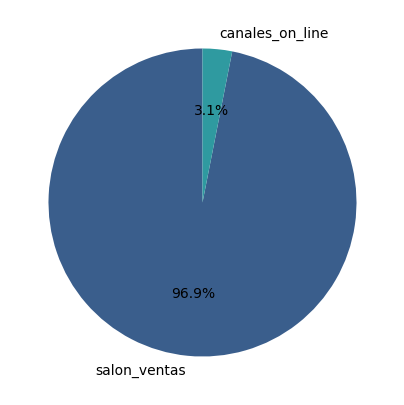

In [9]:
canal_ventas = df.groupby(df.index).agg({
    'salon_ventas': 'sum',
    'canales_on_line': 'sum'
})

total_canal_ventas = canal_ventas.sum()

plt.figure(figsize = (5, 5))
plt.pie(total_canal_ventas, labels = total_canal_ventas.index, autopct='%1.1f%%', startangle = 90, colors = ['#3a5e8cFF', '#2f9aa0FF'])

display(Markdown("## Al categorizar las ventas por canal de ventas, casi la totalidad de las compras fueron realizadas en el salón de ventas, mientras que un porcentaje muy bajo se realizó de forma online:"))

plt.show()

In [10]:
df_melted_medio_pago = pd.melt(df_reset,
                              id_vars = ['indice_tiempo'], 
                              value_vars = ['efectivo', 'tarjetas_debito', 'tarjetas_credito', 'otros_medios'], 
                              var_name = 'medio de pago', 
                              value_name = 'cantidad vendida')

df_melted_medio_pago = df_melted_medio_pago.sort_values(by = 'cantidad vendida', ascending = False)

## A continuación podemos ver que el medio de pago más frecuente dentro del total de ventas son las tarjetas de crédito, seguido por las tarjetas de débito:

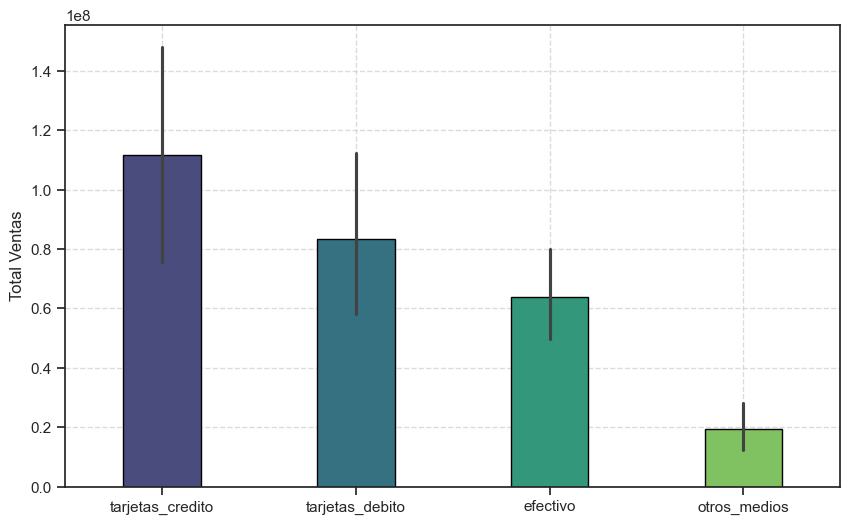

In [11]:
plt.figure(figsize = (10, 6))
sns.set(style="ticks")

ax_2 = sns.barplot(x = 'medio de pago', y = 'cantidad vendida', data = df_melted_medio_pago, hue = 'medio de pago', 
                   palette = 'viridis', width = 0.4, edgecolor = "black")

ax_2.set_axisbelow(True)
plt.xlabel('')
plt.ylabel('Total Ventas')
plt.grid(True, linestyle = '--', alpha = 0.7)

display(Markdown("## A continuación podemos ver que el medio de pago más frecuente dentro del total de ventas son las tarjetas de crédito, seguido por las tarjetas de débito:"))

plt.show()

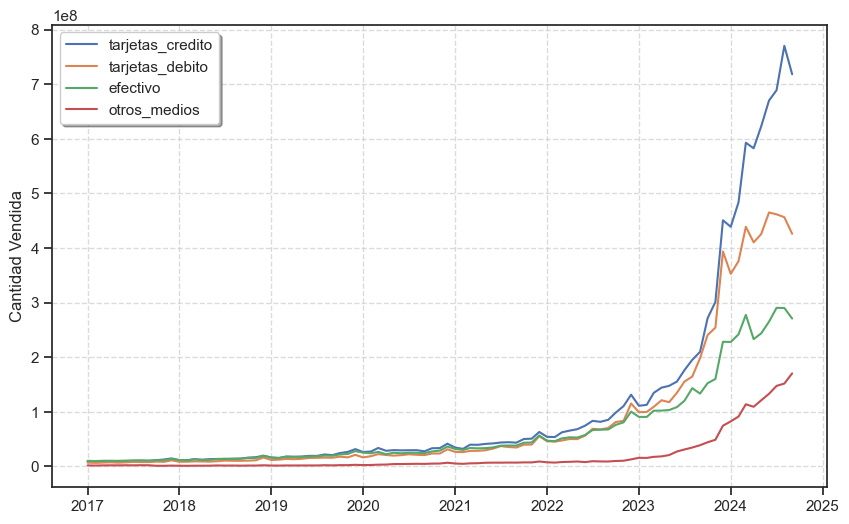

In [12]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'indice_tiempo', y = 'cantidad vendida', data = df_melted_medio_pago, hue = 'medio de pago')
plt.xlabel('')
plt.ylabel('Cantidad Vendida')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'best', shadow = True)
plt.show()

## Vemos que este orden se mantiene, excepto para las tarjetas de débito. Podemos observar que los pagos en efectivo son más frecuentes que las tarjetas de débito desde 2017 hasta mediados de 2022, donde esto cambia y las tarjetas de débito se comienzan a utilizar más que el efectivo. Esto es por diversos factores:
* ## Entre 2022 y 2023, el país enfrentó una de las inflaciones más altas, provocando una disminución del valor del peso argentino.
* ## Durante ese período se promovieron beneficios fiscales para comercios que aceptaran pagos con tarjeta de débito.
* ## Programas como "Ahora 12": Aunque originalmente enfocado a tarjetas de crédito, algunos programas comenzaron a incluir tarjetas de débito.
* ## La pandemia del COVID-19 fomentó el uso de pagos digitales y sin contacto.

## En el siguiente gráfico se presenta más en detalle el cambio entre las ventas en efectivo y las ventas con tarjeta de débito. Sucede precisamente en junio del 2022:

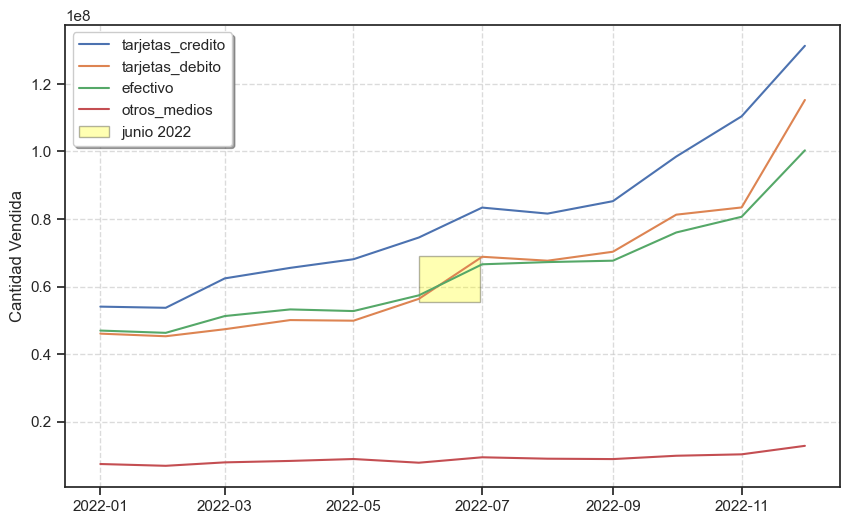

In [13]:
df_temp_medio = df_melted_medio_pago.copy().set_index('indice_tiempo')
df_2022_medio_pago = df_temp_medio[df_temp_medio.index.year.isin([2022])]

plt.figure(figsize = (10, 6))
sns.lineplot(x = df_2022_medio_pago.index, y = 'cantidad vendida', data = df_2022_medio_pago, hue = 'medio de pago')
plt.xlabel('')
plt.ylabel('Cantidad Vendida')

inicio_junio = pd.Timestamp('2022-06-01')
fin_junio = pd.Timestamp('2022-06-30')
plt.axvspan(inicio_junio, fin_junio, facecolor = 'yellow', edgecolor = 'black', alpha = 0.3, label = 'junio 2022', ymin = 0.4, ymax = 0.5)

plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'best', shadow = True)

display(Markdown("## En el siguiente gráfico se presenta más en detalle el cambio entre las ventas en efectivo y las ventas con tarjeta de débito. Sucede precisamente en junio del 2022:"))

plt.show()